In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine_df = pd.read_csv('winedataset.csv')
wine_df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine_df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

In [4]:
wine_df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

OBSERVATIONS:
    
    1. There are 3 types of wines in the dataset
    2. There are no null values in the dataset
    3. Most of the wine data is contributing to the second category of the wine quality.

In [5]:
wine_df.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object

All the data are in numerical format

In [6]:
wine_df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


1. We need to predict the quality of the wine based on the factors which might or might not contribute in the quality
2. We do not see much difference between the mean and the median. Possibilities of outliers are minimal.
3. Proline column mean is much higher than the median/50percentile of the data. May contain outliers.

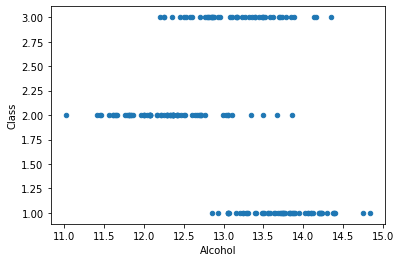

In [7]:
wine_df.plot.scatter(x = 'Alcohol', y = 'Class')

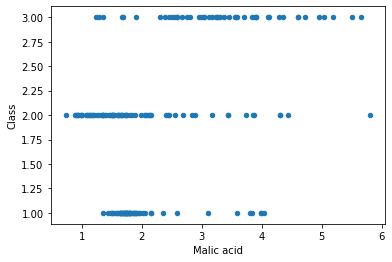

In [8]:
wine_df.plot.scatter(x = 'Malic acid', y = 'Class')

Second class wine is much scattered on the lower malic acid usage

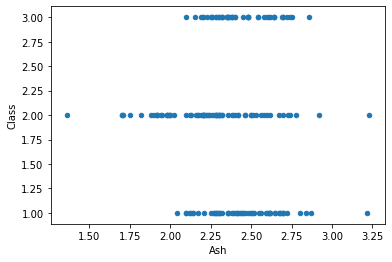

In [9]:
wine_df.plot.scatter(x = 'Ash', y = 'Class')

The class is not showing much difference with the ash and we can say that ash column is not telling much about the class.
If needed then we can drop this column also.

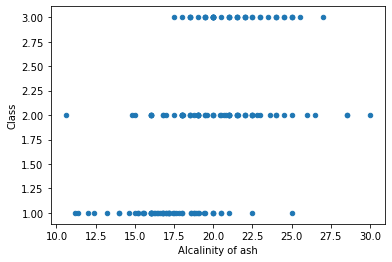

In [10]:
wine_df.plot.scatter(x = 'Alcalinity of ash', y = 'Class')

This tells us that the less the alcalinity of ash the higher the quality of wine is

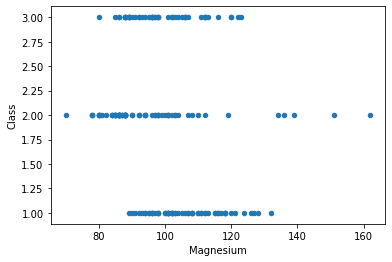

In [11]:
wine_df.plot.scatter(x='Magnesium', y='Class')

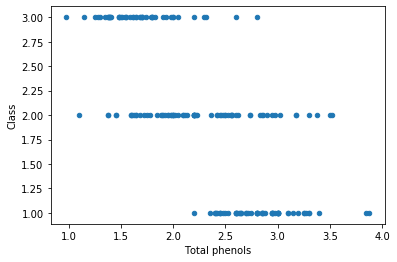

In [12]:
wine_df.plot.scatter(x = 'Total phenols', y = 'Class')

It says that more the phenols are used the more the quality of wine is enhanced

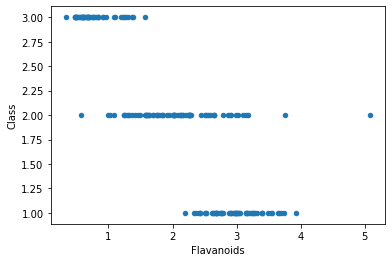

In [13]:
wine_df.plot.scatter(x = 'Flavanoids', y = 'Class')

It says that more the flavanoids are used the more the quality of wine is enhanced

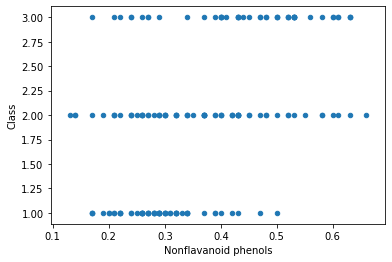

In [14]:
wine_df.plot.scatter(x = 'Nonflavanoid phenols', y = 'Class')

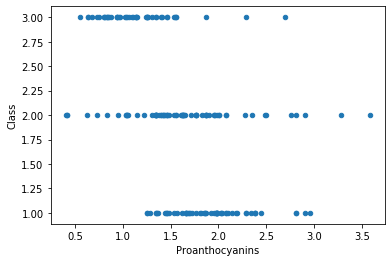

In [15]:
wine_df.plot.scatter(x = 'Proanthocyanins', y = 'Class')

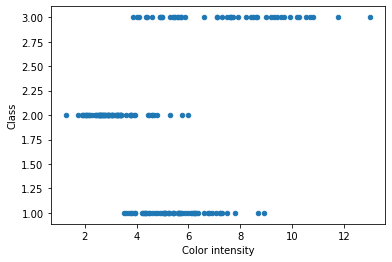

In [16]:
wine_df.plot.scatter(x = 'Color intensity', y = 'Class')

Less color intensity contributes to the second class wine while the more deteorates the quality. So the mid ranged intesity contributes very well

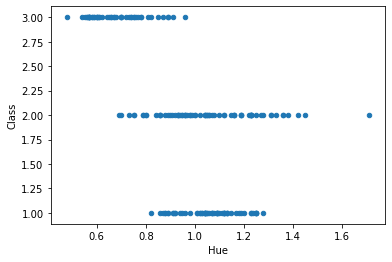

In [17]:
wine_df.plot.scatter(x = 'Hue', y = 'Class')

Lesser the hue contributes to the third class but as the hue increases it may be the first or the second category wine.

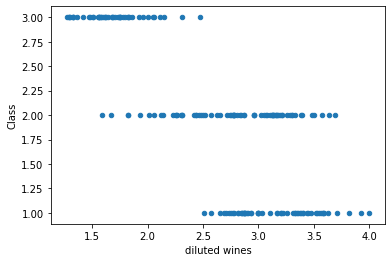

In [18]:
wine_df.plot.scatter(x = 'diluted wines', y = 'Class')

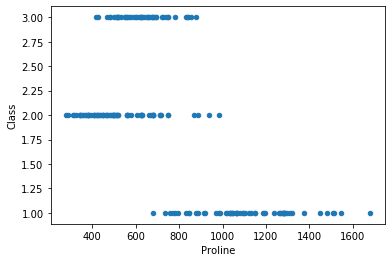

In [19]:
wine_df.plot.scatter(x = 'Proline', y = 'Class')

Proline column tells that higher the proline is the higher the quality of wine is. Also the outlier are valid enough which are actually contrubuting to class.

In [20]:
corr_matrix= wine_df.corr()

(14.0, 0.0)

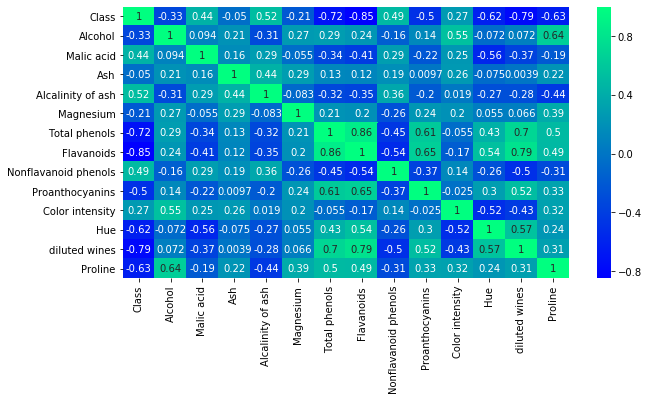

In [21]:
plt.figure(figsize=(10,5))
ax=sns.heatmap(corr_matrix,annot=True,cmap='winter')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Since Ash is very least correlated as compared to other columns and only hav 5% of -ve correlation. We can think of dropping it.

In [22]:
wine_df.drop(['Ash'],axis=1,inplace=True)

In [23]:
wine_df

,Class,Alcohol,Malic acid,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [24]:
np.percentile(wine_df['Proline'],q=95)

1297.2500000000002

Proline column might have some outliers so we can try plotting a boxplot

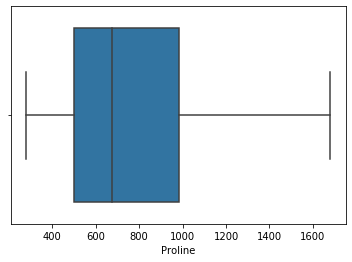

In [25]:
sns.boxplot(wine_df['Proline'])

Proline column do not have any outliers and also it contributes to the class

# Preprocessing of the data

In [26]:
from sklearn import preprocessing

# separate the data from the target attributes
Y = wine_df['Class']
X = wine_df.drop('Class',axis=1)
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [27]:
x=pd.DataFrame(normalized_X,columns=X.columns)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledX = sc.fit_transform(X)

# Choosing the model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 100.0 found at random state 45 


In [31]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 100.0 found at random state 84 


In [32]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=KNeighborsClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 100.0 found at random state 45 


In [33]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=SVC()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 100.0 found at random state 44 


In [34]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=AdaBoostClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 100.0 found at random state 87 


In [35]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 100.0 found at random state 43 


In [36]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=GradientBoostingClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 100.0 found at random state 43 


Since all the classifiers are returning 100% accuracy, we can go ahead with any one to best fit the model

# Finalsing Gradient Boosting classifier model

In [37]:
x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=74)
mod=GradientBoostingClassifier()
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)
tempaccu=accuracy_score(y_test,y_pred)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[10  0  0]
 [ 1 16  3]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      0.80      0.89        20
           3       0.83      1.00      0.91        15

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.92        45
weighted avg       0.92      0.91      0.91        45



In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
score = cross_val_score(mod,X,Y,cv=30,scoring='accuracy').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))

std: 0.0
cross_val_score: 96.12698412698413


our model is neither underfitting nor overfitting

So we can release this model

In [40]:
import joblib
joblib.dump(mod,'wine_Grad_Boost_Classifier.pkl')

['wine_Grad_Boost_Classifier.pkl']